In [13]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [22]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
df['older_and_happy'] = np.where((df['agea']>30) & (df['happy']>5), 1, 0)
df['adolescent'] = np.where(df['agea']<25, 1, 0)
df['partner'] = df['partner']-1
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner']
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.75)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

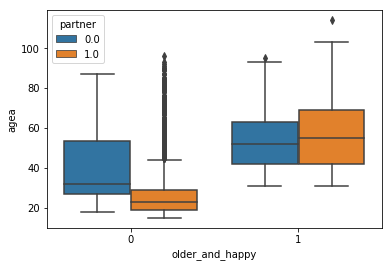

In [23]:
sns.boxplot(df['older_and_happy'], df['agea'], hue=df['partner'])

In [30]:
#We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 550,
          'max_depth': 6,
          'loss': 'exponential',
          'subsample': 1.0,
          'learning_rate': .005,
        }

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

print(table_train)
print(table_test)
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


col_0     0.0   1.0   All
partner                  
0.0      3634   131  3765
1.0      1070  1275  2345
All      4704  1406  6110
col_0     0.0  1.0   All
partner                 
0.0      1152   96  1248
1.0       417  372   789
All      1569  468  2037
Training set accuracy:
Percent Type I errors: 0.02144026186579378
Percent Type II errors: 0.1751227495908347

Test set accuracy:
Percent Type I errors: 0.047128129602356406
Percent Type II errors: 0.20471281296023564


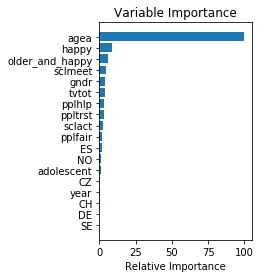

In [25]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Ways to improve this model
* Create new features
* Apply more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Changes made: depth: 2->4 (improved training model, didn't do much for test)
max_iter: 500->750